In [1]:
import pandas as pd
import string
import re
from collections import Counter

# List of common English stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 
    'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
    'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Function to preprocess each email message
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regex
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # remove non-character items
    text = re.sub('[^a-zA-Z ]', '', text)
    
    # Tokenize text by splitting by whitespace
    words = text.split()
    
    # Remove stopwords and words with 1 or 2 characters
    filtered_words = [word for word in words if (word not in stop_words) and len(word) > 2]
    
    return filtered_words

# Read the CSV file into a DataFrame
df = pd.read_csv('spam.csv', encoding='latin-1')

# rename columns
df.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)

# add boolean spam column
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})

# Apply the preprocessing to the 'v2' column (email messages) and create a new column with tokenized words
df['tokens'] = df['message'].apply(preprocess_text)

# Separate spam and ham messages
spam_words = [word for tokens in df[df['labels'] == 'spam']['tokens'] for word in tokens]
ham_words = [word for tokens in df[df['labels'] == 'ham']['tokens'] for word in tokens]

# Count word frequencies for spam and ham
spam_freq = Counter(spam_words)
ham_freq = Counter(ham_words)

# Select the 20 most common words in spam and ham messages
most_common_spam = [word for word, _ in spam_freq.most_common(20)]
most_common_ham = [word for word, _ in ham_freq.most_common(20)]

# Create binary columns for the most common spam and ham words
for word in most_common_spam:
    df[f'spam_{word}'] = df['tokens'].apply(lambda tokens: 1 if word in tokens else 0)

for word in most_common_ham:
    df[f'ham_{word}'] = df['tokens'].apply(lambda tokens: 1 if word in tokens else 0)

df = df.drop(columns=['labels', 'tokens', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Display the first few rows to verify the changes
df.columns

Index(['message', 'label', 'spam_call', 'spam_free', 'spam_txt', 'spam_mobile',
       'spam_text', 'spam_stop', 'spam_claim', 'spam_reply', 'spam_prize',
       'spam_get', 'spam_won', 'spam_nokia', 'spam_new', 'spam_send',
       'spam_urgent', 'spam_cash', 'spam_win', 'spam_contact', 'spam_service',
       'spam_please', 'ham_get', 'ham_ltgt', 'ham_dont', 'ham_ill', 'ham_got',
       'ham_know', 'ham_like', 'ham_call', 'ham_come', 'ham_good', 'ham_day',
       'ham_time', 'ham_love', 'ham_going', 'ham_want', 'ham_one', 'ham_home',
       'ham_lor', 'ham_need', 'ham_sorry'],
      dtype='object')

In [6]:
df.head()

,message,label,spam_call,spam_free,spam_txt,spam_mobile,spam_text,spam_stop,spam_claim,spam_reply,...,ham_day,ham_time,ham_love,ham_going,ham_want,ham_one,ham_home,ham_lor,ham_need,ham_sorry
0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


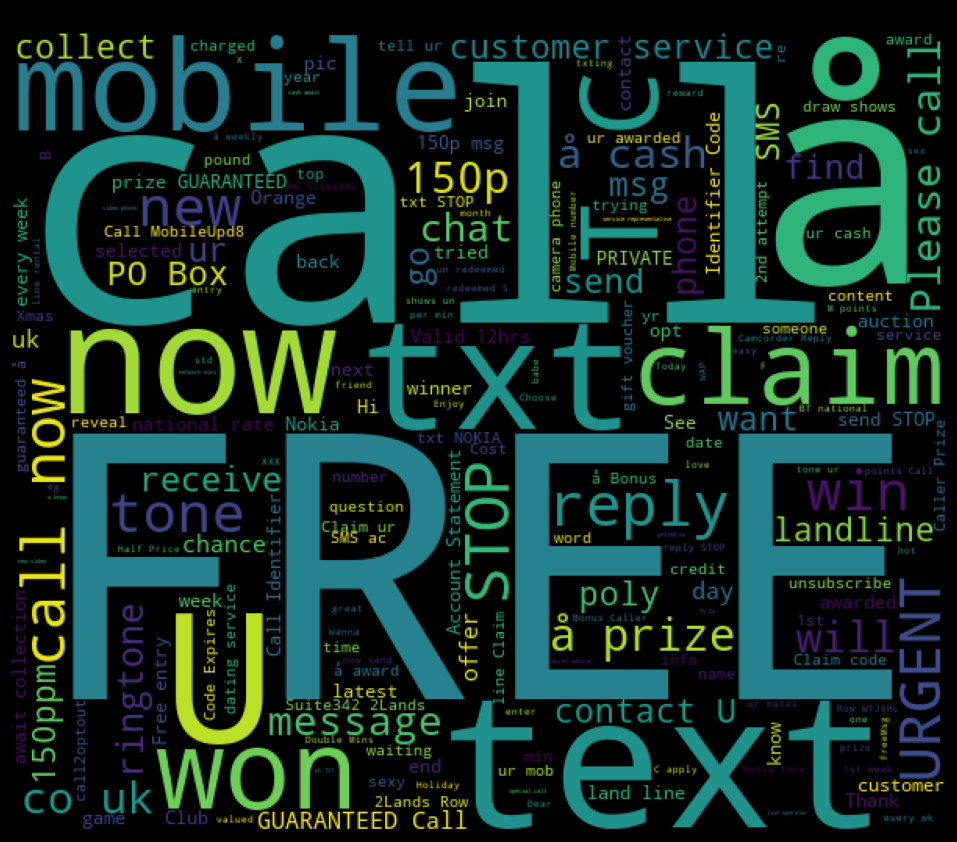

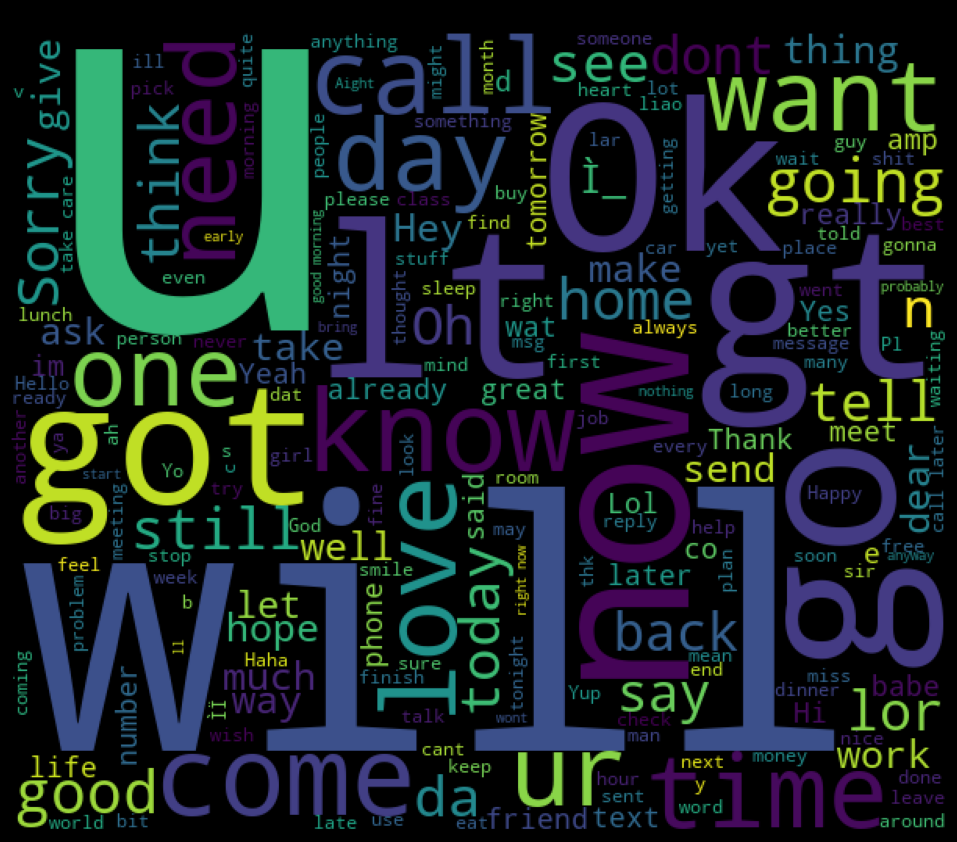

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(list(df[df['label'] == 1]['message']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Spam')
plt.show()

spam_words = ' '.join(list(df[df['label'] == 0]['message']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Ham')
plt.show()